In [1]:
from environment import NormalMoveEnv
from experiment import Trajectory
from nn import BetaModel, Model, GeneralModel
from rl import Agent

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline

# Env

In [5]:
walls=[
    ([-8.,-1.],[10., 1.]), # horozontal
    ([3.,3.],[5., 10.]) # Vertical
]
goal=[([5.,8.],[10.,10.])]

env = NormalMoveEnv(goals=goal, walls=walls)

s = env.reset()
print(s)
print(env.step(0))

# ax = env.plot()

[-4.69991985 -3.82803515]
(array([-3.69641  , -3.8234901], dtype=float32), True, False)


# Trajectory

<AxesSubplot: >

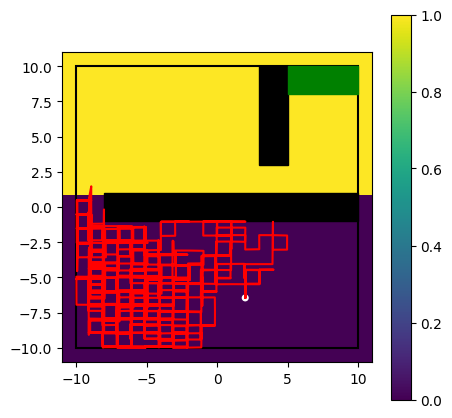

In [6]:
t = Trajectory(env, size=1_000)
ax = t.plot(env.plot())
ax

# NN Model

2892.868775521962 308.2016640785939


<AxesSubplot: >

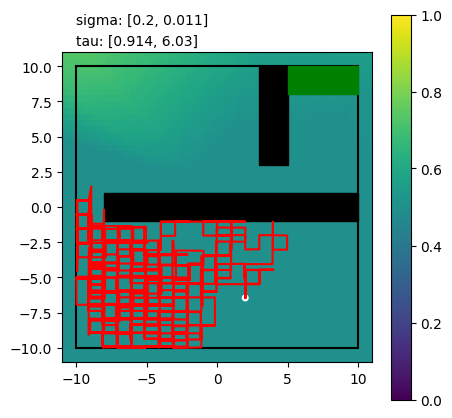

In [7]:
m = Model(env, k=2, lr=1e-5, momentum=.9)

ll = m.batch_train(t.run, 1_000)
print(ll[0], ll[-1])

m.plot(t.plot(env.plot(background=False)))

2682.747815970924 -804.116418729184


<AxesSubplot: title={'center': 'theta_1'}>

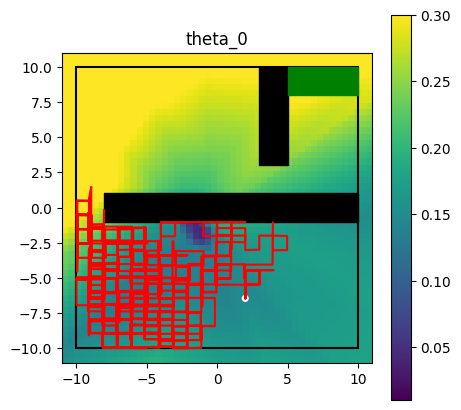

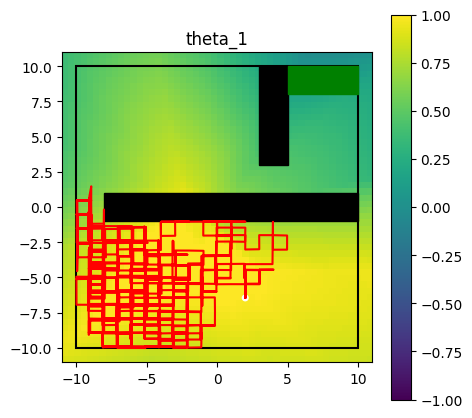

In [8]:
m = GeneralModel(env, k=2, lr=1e-6, momentum=.9)

ll = m.batch_train(t.run, 1_000)
print(ll[0], ll[-1])

# m.plot(t.plot(env.plot(background=False)))
m.plot(t.plot(env.plot(background=False)), param=0)
m.plot(t.plot(env.plot(background=False)), param=1)